In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed = 666
x = 2* np.random.random(size = 100)
y = x * 3. + 4. + np.random.normal(size = 100)

In [3]:
X = x.reshape(-1,1) 

In [19]:
X.shape

(100, 1)

In [5]:
y.shape

(100,)

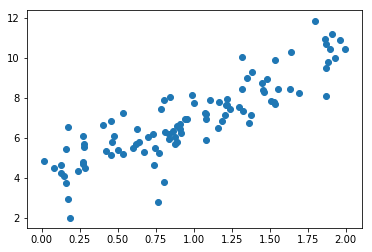

In [6]:
plt.scatter(x,y)

### 梯度下降法训练模型

In [7]:
def  J(theta ,X_b ,y): #原函数
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf') #返回一个float的最大值

In [8]:
def dJ(theta,X_b,y):  #求导函数 ， 其中导数也是一个向量
    res  = np.empty(len(theta))   #因为是J对每一个theta进行偏导数的结果，所以大小和theta一致
    res[0] = np.sum(X_b.dot(theta) - y) #对偏导数第一项直接进行计算jike
    for i in range(1,len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

In [9]:
 def gradient_descent(X_b , y, initial_theata,eta,esplion = 1e-8):  #梯度下降函数
    theta = initial_theata
#     theta_history.append(initial_theata)
    
    while True:
        gradient = dJ(theta , X_b , y)
        last_theta = theta
        theta = theta - eta * gradient
#         theta_history.append(theta)
        
        if(abs(J(theta , X_b , y) - J(last_theta , X_b , y)) <esplion):
            break
    return theta 

In [21]:
X_b = np.hstack([np.ones((len(X),1)),X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b,y,initial_theta ,eta,esplion = 1e-8)

In [24]:
initial_theta

array([0., 0.])

In [11]:
theta 

array([3.84421906, 3.17440587])

In [12]:
len(X_b)

100

In [13]:
len(theta)

2

### 封装我们的线性回归算法

In [14]:
from pycharm_project.LinearRegression import LinearRegression

In [15]:
lin_reg = LinearRegression()

In [16]:
lin_reg.fit_dg(X,y)

LinearRegression()训练完毕

In [17]:
lin_reg.coef_  #系数

array([3.17440587])

In [18]:
lin_reg.interception_  #截距

3.844219057852306